# Course Work: Result Analysis
Dmytro Geleshko

## Import

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Config

In [120]:
np.random.seed(9106)

pd.set_option("display.max_columns", None)

## Data
### Load

In [121]:
df = pd.read_csv("../test2.txt", dtype=np.int32)
df

,iGraphSize,iThreads,seqTime,seqDistance,parTime,parDistance
0,64,2,0,2,1,2
1,64,4,0,3,1,3
2,64,6,0,6,4,6
3,64,8,0,5,3,5
4,64,10,0,6,3,6
...,...,...,...,...,...,...
787,16384,8,3653,13,1108,13
788,16384,10,4581,16,1116,16
789,16384,12,3812,13,966,13
790,16384,14,4158,13,1179,13


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   iGraphSize   792 non-null    int32
 1   iThreads     792 non-null    int32
 2   seqTime      792 non-null    int32
 3   seqDistance  792 non-null    int32
 4   parTime      792 non-null    int32
 5   parDistance  792 non-null    int32
dtypes: int32(6)
memory usage: 18.7 KB


### Comapare Path Distance

In [123]:
compare_test = (df["seqDistance"] == df["parDistance"]).sum()

print("Same distance:\t\t", compare_test)
print("Different distance:\t", len(df) - compare_test)

Same distance:		 792
Different distance:	 0


Це означає що послідовна і паралельна версії алгоритму знаходять шлях з однаковою відстаню для усіх посталених задач. Це також доводить правильність роботи паралельного алгоритму.

### Drop the distances

In [124]:
df.drop(columns=["seqDistance", "parDistance"], inplace=True)

### Show the execution time

In [125]:
df_mean_time = df.groupby(["iGraphSize", "iThreads"]).agg({"parTime": "mean"}).unstack()
df_mean_time[("seqTime", 1)] = df.groupby(["iGraphSize"]).agg({"seqTime": "mean"}).unstack().values
df_mean_time.round(decimals=3)

parTime                                                        \
iThreads          2        4        6        8        10       12       14   
iGraphSize                                                                   
64             4.182    2.636    3.455    2.455    2.364    2.364    2.727   
128            7.455    5.727    5.909    4.273    4.909    5.182    5.727   
256            8.364   11.091    6.727    8.364    8.273    7.545    8.364   
512           28.636   17.545   17.273   13.455   14.455   12.909   16.636   
1024          44.273   39.636   38.091   34.636   27.545   31.636   30.818   
2048          92.273   67.000   53.727   57.909   58.182   62.727   67.909   
4096         205.000  108.091  115.545  113.091  152.455  134.636  131.818   
8192         356.727  242.182  238.273  268.818  276.818  281.000  225.818   
16384       1037.909  695.182  700.182  627.091  671.727  617.091  672.182   

                      seqTime  
iThreads         16        1   
iGraphSize                     
64            2.273     0.000  
128           4.909     0.000  
256           8.909     0.182  
512          10.636     1.466  
1024         22.273     7.545  
2048         76.364    31.409  
4096        119.091   123.159  
8192        260.909   418.659  
16384       494.727  1734.205

### Calculate the speedup

In [126]:
eps = 0.001
df["speedup"] =  (df["seqTime"] + eps) / (df["parTime"] + eps)
df.round(decimals=3)

,iGraphSize,iThreads,seqTime,parTime,speedup
0,64,2,0,1,0.001
1,64,4,0,1,0.001
2,64,6,0,4,0.000
3,64,8,0,3,0.000
4,64,10,0,3,0.000
...,...,...,...,...,...
787,16384,8,3653,1108,3.297
788,16384,10,4581,1116,4.105
789,16384,12,3812,966,3.946
790,16384,14,4158,1179,3.527


In [127]:
print("Min speedup:\t", df["speedup"].min())
print("Max speedup:\t", df["speedup"].max())

Min speedup:	 4.999750012499375e-05
Max speedup:	 4.466333201650296


### View the speedup

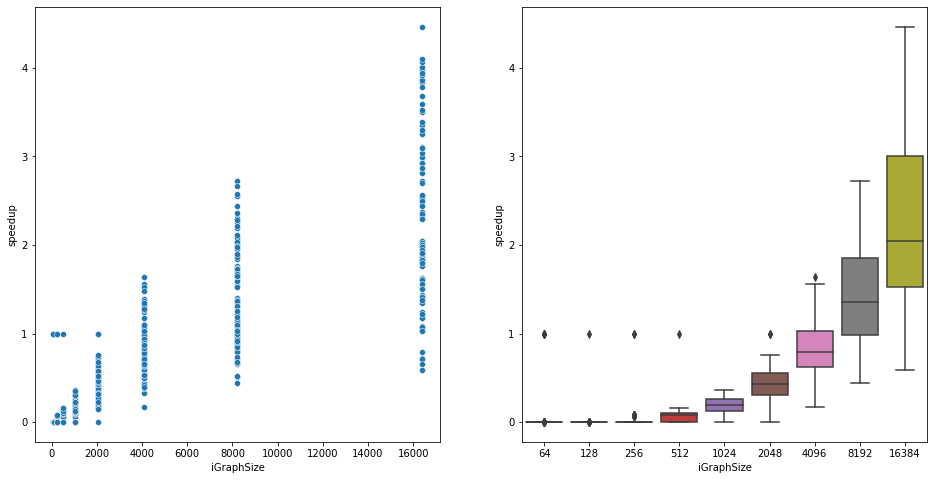

In [128]:
plt.rcParams["figure.figsize"] = (16, 8)

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="iGraphSize", y="speedup")

plt.xlabel("iGraphSize")
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="iGraphSize", y="speedup")

plt.show()

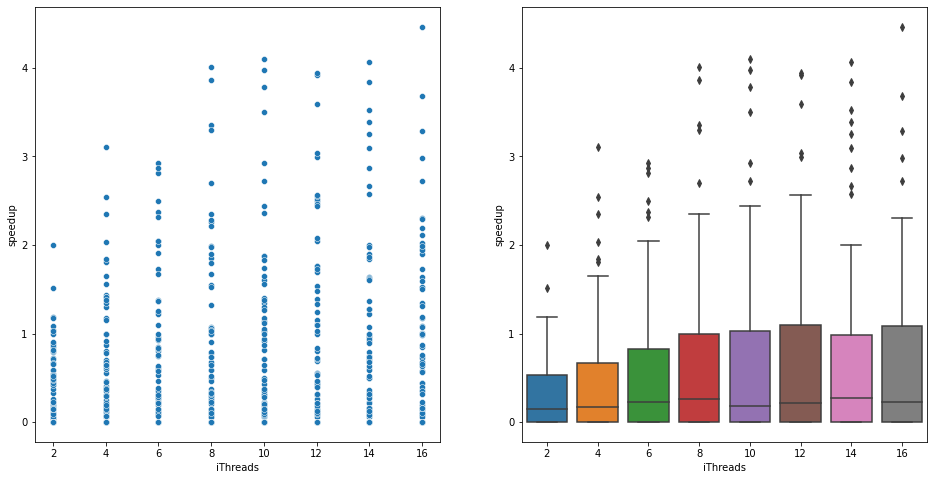

In [133]:
plt.rcParams["figure.figsize"] = (16, 8)

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="iThreads", y="speedup")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="iThreads", y="speedup")

plt.show()

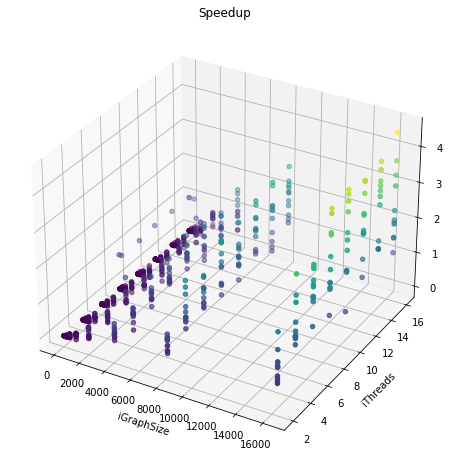

In [129]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(projection="3d")
ax.scatter(df["iGraphSize"], df["iThreads"], df["speedup"], c=df["speedup"], cmap="viridis")

plt.xlabel("iGraphSize")
plt.ylabel("iThreads")
plt.title("Speedup")
plt.show()

In [130]:
df_mean_speedup = df.groupby(["iGraphSize", "iThreads"]).agg({"speedup": "mean"})["speedup"].unstack()
df_mean_speedup.round(decimals=3)

iThreads,2,4,6,8,10,12,14,16
iGraphSize,,,,,,,,
64,0.000,0.001,0.000,0.091,0.001,0.091,0.091,0.091
128,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.091
256,0.005,0.018,0.000,0.119,0.112,0.000,0.015,0.022
512,0.064,0.059,0.084,0.049,0.070,0.052,0.089,0.145
1024,0.131,0.188,0.229,0.208,0.168,0.206,0.223,0.167
2048,0.312,0.328,0.454,0.389,0.341,0.492,0.580,0.602
4096,0.553,0.597,0.742,0.835,1.034,0.945,0.965,0.994
8192,0.737,1.222,1.220,1.565,1.421,1.738,1.662,1.833
16384,1.071,1.774,2.275,2.569,2.707,2.776,2.795,2.425
